Is there a connection between the categories that Regina defined in Paper 2 and the regions of the BPT diagram?

In [1]:
from astropy.table import Table

import numpy as np

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/')
from extract_KIAS2_functions import match_by_index

import matplotlib.pyplot as plt
%matplotlib notebook

# Data

In [2]:
data_directory = '../spirals/'

data_filename = 'Pipe3D-master_file_vflag_BB_minimize_chi10_smooth2p27_mapFit_N2O2_HIdr2_noWords_v5.txt'

data = Table.read(data_directory + data_filename, format='ascii.commented_header')

In [3]:
flux_directory = '/Users/kellydouglass/Documents/Drexel/Research/Data/'

flux_filename = 'kias1033_5_Martini_MPAJHU_flux_oii.txt'

flux = Table.read(flux_directory + flux_filename, format='ascii.commented_header')

## Sample criteria

In [4]:
bad_boolean = np.logical_or.reduce([data['M90_map'] == -99, 
                                    data['M90_disk_map'] == -99, 
                                    data['alpha_map'] > 99, 
                                    data['ba_map'] > 0.998])

sample = data[~bad_boolean]

## Extract flux values and calculate flux ratios

In [5]:
sample = match_by_index(sample, flux, ['NII_6584_FLUX', 'H_ALPHA_FLUX', 'OIII_5007_FLUX', 'H_BETA_FLUX'])

sample['N2_Halpha'] = sample['NII_6584_FLUX']/sample['H_ALPHA_FLUX']
sample['O3_Hbeta'] = sample['OIII_5007_FLUX']/sample['H_BETA_FLUX']

NO MATCHES FOUND FOR GALAXY 10001-12704
NO MATCHES FOUND FOR GALAXY 8466-3704
NO MATCHES FOUND FOR GALAXY 8456-12705
NO MATCHES FOUND FOR GALAXY 8978-12702
NO MATCHES FOUND FOR GALAXY 8978-12703
NO MATCHES FOUND FOR GALAXY 8239-12705
NO MATCHES FOUND FOR GALAXY 8936-3703
NO MATCHES FOUND FOR GALAXY 8341-12705
NO MATCHES FOUND FOR GALAXY 8712-6104
NO MATCHES FOUND FOR GALAXY 9871-12701
NO MATCHES FOUND FOR GALAXY 9507-12705
NO MATCHES FOUND FOR GALAXY 9502-3701
NO MATCHES FOUND FOR GALAXY 9502-12705
NO MATCHES FOUND FOR GALAXY 8086-12705
NO MATCHES FOUND FOR GALAXY 9194-12703
NO MATCHES FOUND FOR GALAXY 9028-12704
NO MATCHES FOUND FOR GALAXY 9024-6102
NO MATCHES FOUND FOR GALAXY 7957-6102
NO MATCHES FOUND FOR GALAXY 7960-6102
NO MATCHES FOUND FOR GALAXY 8154-3704
NO MATCHES FOUND FOR GALAXY 8150-6103
NO MATCHES FOUND FOR GALAXY 7977-12705
NO MATCHES FOUND FOR GALAXY 8145-6101
NO MATCHES FOUND FOR GALAXY 8146-12701
NO MATCHES FOUND FOR GALAXY 8145-1902
NO MATCHES FOUND FOR GALAXY 8624-37

<ipython-input-5-c226a545d331>:3: RuntimeWarning: divide by zero encountered in true_divide
  sample['N2_Halpha'] = sample['NII_6584_FLUX']/sample['H_ALPHA_FLUX']
<ipython-input-5-c226a545d331>:3: RuntimeWarning: invalid value encountered in true_divide
  sample['N2_Halpha'] = sample['NII_6584_FLUX']/sample['H_ALPHA_FLUX']


# Separate galaxies based on their location in the BPT diagram

In [8]:
# Star-forming
SF_boolarray = np.logical_or(sample['BPT'] == 1, sample['BPT'] == 2)

# Composite
comp_boolarray = sample['BPT'] == 3

# AGN
AGN_boolarray = np.logical_or(sample['BPT'] == 4, sample['BPT'] == 5)


SF = sample[SF_boolarray]
comp = sample[comp_boolarray]
AGN = sample[AGN_boolarray]

<IPython.core.display.Javascript object>


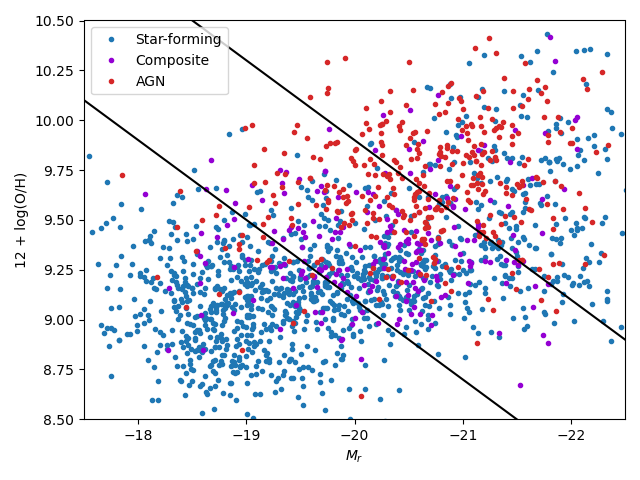

In [23]:
plt.figure()

plt.plot(SF['rabsmag'], SF['Z12logOH'], '.', color='tab:blue', label='Star-forming')
plt.plot(comp['rabsmag'], comp['Z12logOH'], '.', color='darkviolet', label='Composite')
plt.plot(AGN['rabsmag'], AGN['Z12logOH'], '.', color='tab:red', label='AGN')

Mr = np.linspace(-23,-17,5)
plt.plot(Mr, 0.4*Mr + 17.9, 'k')
plt.plot(Mr, 0.4*Mr + 17.1, 'k')

plt.xlabel('$M_r$')
plt.ylabel('12 + log(O/H)')

Mr_bins2d = np.linspace(-22.5, -17.5, 5)
Z_bins2d = np.linspace(8.5, 10.5, 5)

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(Z_bins2d[0], Z_bins2d[-1])

plt.legend()

plt.tight_layout();